## P4DS: Assignment 3 (Autumn 2021)

# Data Analysis Project

#### Notebook template design: Brandon Bennett 
Original: 2020.11.3<br>
Revised: 2021.03.02, 2021.11.10

# Prediciton of restaurant's success for clients in Bangalore


* Ziwei Wang, sc212zw@leeds.ac.uk

# Project Plan

## The Data (10 marks)

In this project, we will investigate restaurants' data in a specific city, Bangalore, the third most populous city in India. The data is taken from the website Kaggle, and the specific dataset is from Zomato Bangalore Restaurants (https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants/version/1) which is obtained from a company called Zomato.

The dataset collects data from over 10,000 restaurants with 51,717 data entries. Each data entry contains seventeen features which are 'url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)’. Those features representation are shown below.

|Feature name|Description|Value characteristic
|:---|:-----|:-----|
url	| The url of the restaurant review in the Zomato website	| String with 51717 unique values
address	| The restaurant address	|String with 11495 unique values
name	|The restaurant name|String with 8792 unique values
online_order	|Is available for online ordering or not	|String as Yes or No 
book_table	|Is available for table booking or not	|String as Yes or No
rate	|The overall rating of the restaurant	|String
votes	|The total number of rating for the restaurant	|Integer
phone	|The phone number of the restaurant	|String
location	|The neighbourhood that the restaurant is located	|String with 94 unique values
rest_type	|The restaurant type	|String with 94 unique values
dish_liked	|The dishes people liked in the restaurant	|String
cuisines	|The food styles provided in the restaurant 	|String
approx_cost(for two people)	|The approximate cost of a meal for two people	|Integer from 40 to 6000
reviews_list	|The list containing reviews for the restaurant in two aspects: rating and review	|String
menu_item	|The list of menus in the restaurant	|String
listed_in(type)	|The type of meal restaurant provided	|String with 7 unique values
listed_in(city)	|The neighbourhood in which the restaurant is listed	|String with 30 unique values

This data is as of March 2019. With over 50,000 unique addresses and only 10,000+ distinct restaurant names, excluding the possibility of various restaurants with the same name and chain restaurants, we can come out with the fact that duplication happens inside the dataset. We can also find that a significant amount of data is unavailable to present helpful information, such as the 7,000+ null entries in the rate column.

## Project Aim and Objectives (5 marks)

We aim to provide our clients ready to enter the restaurant industry with a tool to make a relatively better decision. Based on the arrangement of the various attributes of the restaurant in the client's plan, this tool determines the degree of success of the client's plan. The degree of success is used as effective feedback to allow the client to enhance the restaurant's attributes. It also serves as an informative suggestion to give the client's plan a better chance of success.


To define the level of success of a restaurant, the rating is one of the most critical indicators, and it can also judge a restaurant's performance from the point of view of its customers. However, when a restaurant has very few votes, the bias of the data will be at an appreciable level, regardless of the trend that rating reveal. Thus, we need to look at more than just rating, but the number of customers to the restaurant. Therefore, the number of ratings used as voted in the dataset could represent this attribute to some extent. As a result, we combine the rate and the vote to indicate the restaurant's success in this project.

One of our most important tasks is to give a response that is as accurate as possible to the user. In order to achieve this, we need to compare various models across the board to select the one that gives the most accurate response relative to each other. This chosen model we provide will give the customer more helpful information and reduce the risk of loss.

In addition, we visualise the data on restaurant prices at the initial stage when the client is deciding on the restaurant's attributes. The heatmap that we will implement gives the client a clear idea of the restaurant concentrations in the city and a clearer understanding of the initial restaurant pricing, providing a solid basis for subsequent planning.

### Specific Objectives

* __Objective 1:__ The correlation between price and the level of restaurant success is shown with restaurant price distribution. The restaurant prices are displayed on a heat map so that the customer can have an objective view of the commercial area formed by the whole city and provide an initial basis for their decision.
* __Objective 2:__ Using the available data, compare the predictions of several algorithmic models suitable for this type of data structure for the restaurant's results providing the conditions. Then select the algorithm that best suits our requirements. In the end, the prediction model as a tool will help the restaurant plan improve by comparing various combinations of restaurant features.

## System Design (5 marks)

### Architecture

The system's overall structure is shown as the red area below, which is divided into three components. They are Initial Preparation, Model Selection, and Data Analysis & Visualisation. In Initial Preparation, the database is read and carry out a number of data cleaning processes, which remove redundant and invalid data and remove the system's unrequired restaurant features. The data then enters a transformation process, where the data used for further analysis transforms into a more computationally friendly form. The data processing part ends here, and the processed data transmit into the Model Selection. After the training section of models, data and models will be sent to Data Analysis & Visualisation while runing model evaluation simultaneously.

The Model Selection section enables several models to evaluate their outputs to select the best model. On the other hand, the data is carefully analysed in the Data Analysis & Visualisation section to conclude specific attributes. A series of visualisations are produced based on these.

![title](arch_2.png)
  
### Processing Modules and Algorithms


1. K-mean cluster, is used to generate clusters based on restaurants’ rate and votes
2. Decision trees, is used as one of the model to predict restaurants’ success
3. Extra trees, is used as one of the model to predict restaurants’ success
4. Linear regression, is used as one of the model to predict restaurants’ success
5. Random forest, is used as one of the model to predict restaurants’ success

# Program Code (15 marks)

Please note the following about your code:
* <b><i>You may import any packages/modules you wish to use for your project.</i></b>


* <b><i>You should submit your notebook in a state where all cells have been
    executed and are displaying the output that you wish to present for grading.</i></b>
    (We will not normally run your code, unless for some reason we wish to check
    that the code functionality matches the given description.)
    
    
* Although you may be programming in a "pipeline" style, it is strongly suggested you use function definitions to organise your code. As well as being generally good programming practice, it will be helpful for easy and flexibily presentation of results visualisations later in the document. In the visualisation sections you will be able to produce images in a concise and flexible way by calling functions defined in the program code secion.

#### _Loading libraries_


_The following code import the necessary libraries to run the code below_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from folium import Map
from folium.plugins import HeatMap, FastMarkerCluster
from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.cluster import KMeans

#### _Loading dataset_


_The following code read the data from the file_

In [2]:
def read_data():
    df = pd.read_csv("zomato.csv")
    return df


original_df = read_data()
original_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


_The output shows the basic data structure of the read data._

#### _Data cleaning --- drop unnecessary columns_

_The following code drop the features that are not going to be used in the project._

In [3]:
df = original_df.copy()

def drop_unnecessary_columns(df):
    df.drop(columns=['dish_liked', 'cuisines', 'menu_item'], inplace=True)
    df.drop(columns=['name', 'url', 'phone', 'reviews_list', "listed_in(city)"], inplace=True)
    return df


df = drop_unnecessary_columns(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.6+ MB


_The output show the remaining column of the data table._

#### _Data cleaning --- rename features_

_The follwing code drop address column._

In [4]:
def rename_features(df):
    df.rename(columns={'approx_cost(for two people)': 'price', 'listed_in(city)': 'city_area',
                      'listed_in(type)': 'meal_type'}, inplace=True)
    return df


df = rename_features(df)
df.columns

Index(['address', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'price', 'meal_type'],
      dtype='object')

_All the column names after changes._

#### _Data cleaning ---  remove invalid entry_

_The following code drop invalid data included null and NaN in the table._

In [5]:
def remove_nan(df):
    df["rate"] = df["rate"].replace("NEW", np.nan)
    df["rate"] = df["rate"].replace("-", np.nan)
    df.dropna(how='any',inplace=True)
    return df


df = remove_nan(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41271 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       41271 non-null  object
 1   online_order  41271 non-null  object
 2   book_table    41271 non-null  object
 3   rate          41271 non-null  object
 4   votes         41271 non-null  int64 
 5   location      41271 non-null  object
 6   rest_type     41271 non-null  object
 7   price         41271 non-null  object
 8   meal_type     41271 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.1+ MB


_The output shows there is no more invalid data in the table._

#### _Data cleaning --- remove duplicate_

_Drop duplicate data entry_

In [6]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29596 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       29596 non-null  object
 1   online_order  29596 non-null  object
 2   book_table    29596 non-null  object
 3   rate          29596 non-null  object
 4   votes         29596 non-null  int64 
 5   location      29596 non-null  object
 6   rest_type     29596 non-null  object
 7   price         29596 non-null  object
 8   meal_type     29596 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.3+ MB


_Shows how many data entries have left_

#### _Data cleaning --- drop address column_

_The following code drop address column of the dataframe_

In [7]:
def drop_address(df):
    df.drop(columns=["address"], inplace=True)
    return df


df = drop_address(df)

#### _Data tranformation --- transform rate and price_

_Transfrom rate in table from "x.y/5.0" to "x.y" and transform the price from "x,xxx" into "xxxx" for changing them into numeric type in the further section._

In [8]:
def transform_rate(df):
    rates = []
    for _, row in df.iterrows():
        rate_in_float = float(row["rate"].split("/")[0])
        rates.append(rate_in_float)
    df["rate"] = rates
    return df


def transform_price(df):
    prices = []
    for _, row in df.iterrows():
        price_s = row["price"]
        price_s = price_s.replace(",", "")
        price = int(price_s)
        prices.append(price)
    df["price"] = prices
    return df


df = transform_rate(df)
df = transform_price(df)

df[["rate", "price"]].head()

,rate,price
0,4.1,800
1,4.1,800
2,3.8,800
3,3.7,300
4,3.8,600


_The rate and price column after tranformation._

#### _Data transformation --- transform location into cooridnate_

_The following code gets all the location in the table, then get their corresponding latitude and longitude._

In [9]:
def get_geo_info_location(location):
    geo_info = geolocator.geocode(location)
    if geo_info is None:
        return np.nan, np.nan
    return geo_info.latitude, geo_info.longitude


def get_location_coordinate(df):
    all_location = df["location"].unique()
    coordinate = dict()
    for location in all_location:
        coordinate[location] = get_geo_info_location(location + ", Bangalore")
    return coordinate


geolocator=Nominatim(user_agent="app")   
lat_lon_location = get_location_coordinate(df)
lat_lon_location

{'Banashankari': (12.9152208, 77.573598),
 'Basavanagudi': (12.9417261, 77.5755021),
 'Mysore Road': (12.9597523, 77.5561291),
 'Jayanagar': (12.9292731, 77.5824229),
 'Kumaraswamy Layout': (12.9081487, 77.5553179),
 'Rajarajeshwari Nagar': (12.9274413, 77.5155224),
 'Vijay Nagar': (12.96595445, 77.61253320881664),
 'Uttarahalli': (12.9055682, 77.5455438),
 'JP Nagar': (12.9072515, 77.5782713),
 'South Bangalore': (12.9172247, 77.6143995),
 'City Market': (12.965717999999999, 77.5762705372058),
 'Bannerghatta Road': (12.8870547, 77.5969483),
 'BTM': (12.911275849999999, 77.60456543431182),
 'Kanakapura Road': (12.9065281, 77.5733344),
 'Bommanahalli': (12.9089453, 77.6239038),
 'Electronic City': (12.8563536, 77.6636073),
 'Wilson Garden': (12.9489339, 77.5968273),
 'Shanti Nagar': (12.9575547, 77.5979099),
 'Koramangala 5th Block': (12.928080600000001, 77.63071968728623),
 'Richmond Road': (12.9649453, 77.5982978),
 'HSR': (12.9116225, 77.6388622),
 'Koramangala 7th Block': (12.928080

_The output shows all the location and their cooridinates_

#### _Data transformation --- encode features_

_The following code encodes all the columns to numeric forms for later training processes excepts for rate, price, and votes in which they are in the numeric form already._

In [10]:
def Encode(df):
    column_dict = dict()
    for column in df.columns[~df.columns.isin(['rate', 'price', 'votes'])]:
        df[column], column_dict[column] = df[column].factorize()
    return df, column_dict


df_float, column_dict = Encode(df.copy())
df_float.head()

,online_order,book_table,rate,votes,location,rest_type,price,meal_type
0,0,0,4.1,775,0,0,800,0
1,0,1,4.1,787,0,0,800,0
2,0,1,3.8,918,0,1,800,0
3,1,1,3.7,88,0,2,300,0
4,1,1,3.8,166,1,0,600,0


_The output shows all the values as a number in the table._

#### _Data transformation --- encode feature for prediction_

_The following code encodes all the columns to numeric forms for later training processes excepts for rate, price, and votes in which they are in the numeric form already._

In [11]:
def encode_predict(df):
    df_encode = df.copy()
    for column in df.columns[~df.columns.isin(['rate', 'price', 'votes'])]:
        index = list(column_dict[column]).index(df[column].item())
        df_encode[column] = index
    return df_encode


df_example = df[:1].iloc[:,[0, 1, 4, 5, 6, 7]]
df_exm_encode = encode_predict(df_example)

_The output shows all the values as a number in the table._

#### _Model training and evaluation --- data division_

_The following code divides data into train data and test data for model training and validation, respectively._

In [12]:
def get_train_test_data(df_float):
    x = df_float.iloc[:,[0, 1, 4, 5, 6, 7]]
    y = df_float.iloc[:,[2, 3]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=111)
    return x_train, x_test, y_train, y_test


x_train, x_test, y_train, y_test = get_train_test_data(df_float)
x_train.head()

,online_order,book_table,location,rest_type,price,meal_type
51429,1,1,25,2,300,4
47599,0,1,1,2,200,2
47100,1,1,52,2,300,4
46558,1,1,6,0,600,2
17827,0,1,72,2,150,2


_The output shows the first 5 of the train data._

#### _Model training --- decision trees_

_The following code uses decision tree regression to predict the outcome._

In [13]:
def train_decision_tree(x_train, y_train):
    decision_tree = DecisionTreeRegressor()
    decision_tree.fit(x_train, y_train)
    return decision_tree


DT_model = train_decision_tree(x_train, y_train)

#### _Model training --- linear regression_

_The following code uses linear regression to predict the outcome._

In [14]:
def train_linear_regression(x_train, y_train):
    linear_regression = LinearRegression()
    linear_regression.fit(x_train, y_train)
    return linear_regression


LR_model = train_linear_regression(x_train, y_train)

#### _Model training --- random forest_

_The following code uses random forest regression to predict the outcome._

In [15]:
def train_random_forest(x_train, y_train):
    random_forest = RandomForestRegressor(n_estimators=500, min_samples_leaf=.0001)
    random_forest.fit(x_train, y_train)
    return random_forest


RF_model = train_random_forest(x_train, y_train)

#### _Model training --- extra trees_

_The following code uses extra tree regression to predict the outcome._

In [16]:
def train_extra_tree(x_train, y_train):
    extra_tree = ExtraTreesRegressor(n_estimators = 100)
    extra_tree.fit(x_train, y_train)
    return extra_tree


ET_model = train_extra_tree(x_train, y_train)

#### _Model evaulation --- general model evaluation_

_The following code use the R2 score to show how well the model given at predicting test data for all the models below._

In [17]:
def test_model(model, x_test, y_test):
    y_predict=model.predict(x_test)
    score = r2_score(y_test, y_predict)
    return score

#### _Model evaulation --- all 4 model evalutate_

_The following code use the R2 score to show how well the model given at predicting test data for all the models below._

In [18]:
RF_score = test_model(RF_model, x_test, y_test)
DT_score = test_model(DT_model, x_test, y_test)
LR_score = test_model(LR_model, x_test, y_test)
ET_score = test_model(ET_model, x_test, y_test)


evaluation = pd.DataFrame({"Model": ["Random Forest", "Decision Tree", "Linear Regression", "Extra Trees"], 
                           "R^2 Score": [RF_score, DT_score, LR_score, ET_score]})

evaluation.sort_values(by = 'R^2 Score', ascending = False, ignore_index=True)

,Model,R^2 Score
0,Extra Trees,0.712553
1,Decision Tree,0.704545
2,Random Forest,0.696247
3,Linear Regression,0.239628


The table contains models and their corresponding R2 score in predicting restaurants' success.

#### _Data analysis part I_

_The following code divide dataframe into n_cluster different clusters._

In [19]:
def success_cluster(n_cluster=5):
    df_cluster = df.copy()
    kmean = KMeans(n_clusters=n_cluster, random_state=100).fit(df_cluster[["rate", "votes"]])
    df_cluster["cluster"] = kmean.labels_
    return df_cluster

#### _Data analysis part II_

_The following code show the data distribution of 3 numeric features._

In [20]:
df.describe()

,rate,votes,price
count,29596.000000,29596.000000,29596.000000
mean,3.732795,425.418807,634.191039
std,0.452360,1007.120697,481.071328
min,1.800000,0.000000,40.000000
25%,3.400000,24.000000,300.000000
50%,3.800000,93.000000,500.000000
75%,4.100000,356.000000,800.000000
max,4.900000,16832.000000,6000.000000


_The output shows the distribution of rate, votes, and price._

#### _Data analysis part III_

_The following code divide dataframe into n_cluster different clusters._

In [21]:
def predict(model, restaurant_plan):
    plan_encode = encode_predict(restaurant_plan)
    return model.predict(plan_encode)

#### _Data analysis part IV_

_The following code provide an overview for the feature price which are going to be used in Objective 1._

In [22]:
df["price"].describe()

count    29596.000000
mean       634.191039
std        481.071328
min         40.000000
25%        300.000000
50%        500.000000
75%        800.000000
max       6000.000000
Name: price, dtype: float64

In [23]:
df['location'].value_counts()[:10]

BTM                      2091
Indiranagar              1581
Koramangala 5th Block    1557
Whitefield               1540
HSR                      1477
Marathahalli             1367
JP Nagar                 1150
Jayanagar                1114
Bellandur                 952
Bannerghatta Road         856
Name: location, dtype: int64

In [24]:
pd.DataFrame(df.groupby(['location'])['price'].mean()).sort_values(["price"])

,price
location,
Nagarbhavi,250.000000
North Bangalore,300.000000
Peenya,300.000000
Yelahanka,325.000000
South Bangalore,326.190476
...,...
Infantry Road,1259.876543
MG Road,1296.327684
Race Course Road,1380.434783


In [25]:
pd.DataFrame(df.groupby(['location'])['price'].median()).sort_values(["price"])

,price
location,
North Bangalore,250
Nagarbhavi,250
Magadi Road,300
"Varthur Main Road, Whitefield",300
Basavanagudi,300
...,...
Race Course Road,1100
Infantry Road,1100
MG Road,1200


In [26]:
df[df["price"] <= 1000].count()/ df.count()

online_order    0.855183
book_table      0.855183
rate            0.855183
votes           0.855183
location        0.855183
rest_type       0.855183
price           0.855183
meal_type       0.855183
dtype: float64

In [27]:
df[(1000 < df["price"]) &  (df["price"] <= 2000)].count()/ df.count()

online_order    0.128801
book_table      0.128801
rate            0.128801
votes           0.128801
location        0.128801
rest_type       0.128801
price           0.128801
meal_type       0.128801
dtype: float64

#### _Visualisation --- heat map_

The following cells produce several heat maps based on different information to be used later in Objective 1

In [28]:
def heatmap_generate(lat_lon_location, location_info, need_clustering=False):
    map_info = []
    for location in location_info:
        if not np.isnan(lat_lon_location[location][0]):
            map_info.append(list(lat_lon_location[location]) + [float(location_info[location]) ** 2])
    base_map = Map(location=[12.9716, 77.5946], zoom_start=11)
    HeatMap(map_info ,zoom=20,radius=15).add_to(base_map)
    if need_clustering:
        FastMarkerCluster(map_info).add_to(base_map)
    return base_map

In [29]:
def generate_count_heatmap():
    location_count = dict(df['location'].value_counts())
    heatmap_count = heatmap_generate(lat_lon_location, location_count)
    return heatmap_count

In [30]:
def generate_avg_price_heatmap():
    avg_price = dict(df.groupby(['location'])['price'].mean())
    heatmap_avg = heatmap_generate(lat_lon_location, avg_price, need_clustering=True)
    return heatmap_avg

In [31]:
def generate_med_price_heatmap():
    med_price = dict(df.groupby(['location'])['price'].median())
    heatmap_med = heatmap_generate(lat_lon_location, med_price, need_clustering=True)
    return heatmap_med

#### _Visualisation --- distribution graph_

The following cells produce price distribution.

In [32]:
def plot_price_dist():
    fig, ax = plt.subplots(figsize=[10,4])
    sns.distplot(df["price"], ax=ax, axlabel="price of restaurant ").set_title("Figure 1")

#### _Visualisation --- cluster_

The following cells produce several dot plots based on restaurants' cluster.

In [33]:
def plot_rate_votes_cluster(n_cluster=5):
    df_cluster = success_cluster(n_cluster)
    colors = ["g", "r", "b", "c", "m", "y"]
    
    plt.figure(figsize = (8,5))
    
    for i in range(n_cluster):
        selected = df_cluster[df_cluster["cluster"] == i]
        plt.plot(selected["rate"], selected["votes"], "ob", color=colors[i])
    plt.xlabel("rate")
    plt.ylabel("votes")
    plt.title("Figure 2")
    plt.show()

In [34]:
def plot_rate_price_cluster(n_cluster=5):
    df_cluster = success_cluster(n_cluster)
    colors = ["g", "r", "b", "c", "m", "y"]
    plt.figure(figsize = (8,5))
    for i in range(n_cluster):
        selected = df_cluster[df_cluster["cluster"] == i]
        plt.plot(selected["rate"], selected["price"], "ob", color=colors[i])
    plt.xlabel("rate")
    plt.ylabel("price")
    plt.title("Figure 3")
    plt.show()

In [35]:
def plot_votes_price_cluster(n_cluster=5):
    df_cluster = success_cluster(n_cluster)
    colors = ["g", "r", "b", "c", "m", "y"]
    plt.figure(figsize = (8,5))
    for i in range(n_cluster):
        selected = df_cluster[df_cluster["cluster"] == i]
        plt.plot(selected["votes"], selected["price"], "ob", color=colors[i])
    plt.xlabel("votes")
    plt.ylabel("price")
    plt.title("Figure 4")
    plt.show()

# Project Outcome (10 + 10 marks)

## Overview of Results
Throughout the distribution of price and various heat maps, we can conclude that a reasonable price range for a restaurant should be set between 0 and 2000, which we will discuss in detail in Objective 1 below. Furthermore, the high density of restaurants in the BTM area assumes that BTM has better customers with high competitivity. If we choose to open a restaurant inside BTM, we need to obtain a higher success rate to prevent expected loss.

We then apply the selected model to predict the success of a case and, by moving the parameters around, select a more suitable combination of restaurant characteristics to achieve a higher chance of success which explanation will be given in Objective 2. 

## Objective 1

### Explanation of Results

Based on the distribution of price shown below and the output of the data analysis part 4 above, we observe that the majority of restaurants are within the 1000 price range, which accounts for approximately 86% of the total. The majority costs of the remaining restaurants are also between 1000 and 2000, which accounts for around 12% of the total. Those two parts occupy over 98%. The average price of a restaurant is 634, and its median is 500. However, in extreme cases, a restaurant can spend up to 6000, and the lowest is 40.

We have classified the restaurants according to the K-mean algorithm regarding rate and votes. As shown in Figure 2 below, they are divided into five groups, from cyan, which represents the highest success at the beginning, to green, which is the most mediocre. The number distribution is reversed. In Figure 3, the x-axis is the rate, and the y-axis is the price. We can observe that the more successful the colour is, the more it appears in the bottom right corner of the image, and it indicates that overpriced restaurants cannot reach a higher level of success. In Figure 4, the two dimensions are price and votes, and we can observe that the most successful restaurants are concentrated within the price range of 2000, while the most successful ones are in the price range of 1000-2000.

Since the size of the data is not tiny, we calculate the square of the relevant weight in order to make the image show the characteristics of the data better, for example, if the number of restaurants in a region is 10, then its weight on the graph will be 100.
The first heat map in Figure 5 shows a heat map of the distribution of restaurants in the city. We can observe three areas of concentration: the BTM area with 2,091 restaurants, with the second to fifth places being around 1,500 restaurants. The second heat map is based on each location's average price, and we have added the cluster function to it. This feature allows the heat map to cluster the restaurants in nearby locations, and it can form different combinations at different scales, giving a more visual representation. In the graph, we can see the red area representing Sankey Road, and it has an average value of 2522, over 1000 higher than Lavelle Road in second place. In third place is the restaurant door on Race Course Road, with a value of 1380. The third heat map is for the median price. We thought that the data distribution would deviate from the mean graph, but they are all very similar. Sankey Road still occupies first place with a value of 2400, and Lavelle Road still occupies second place with a value of 1400.

### Visualisation
The following graph is named from Figure 1 to 7.

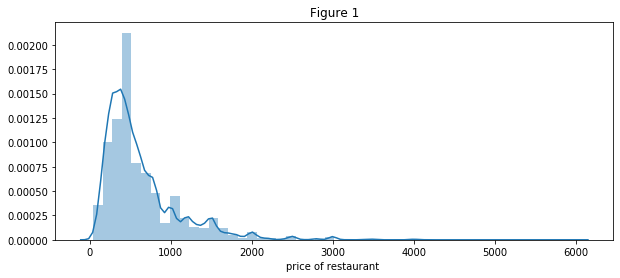

In [36]:
plot_price_dist()

Figure 1 shows the distribution of price

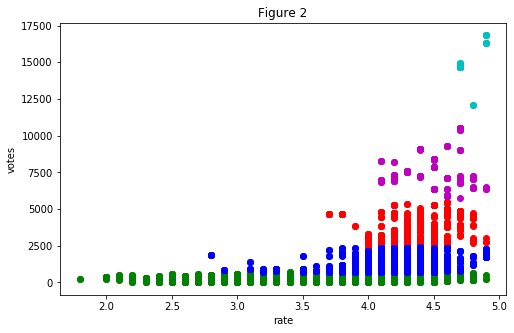

In [37]:
plot_rate_votes_cluster(n_cluster=5)

Figure 2 shows the cluster group across rate and votes.

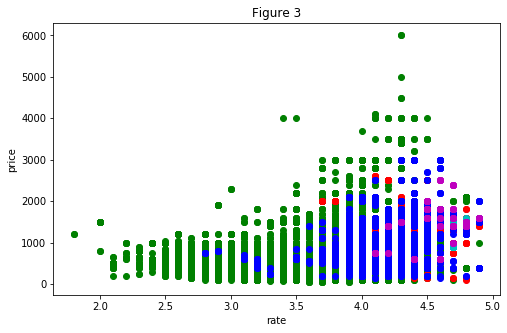

In [38]:
plot_rate_price_cluster(n_cluster=5)

Figure 3 shows the cluster group defined by success across rate and price.

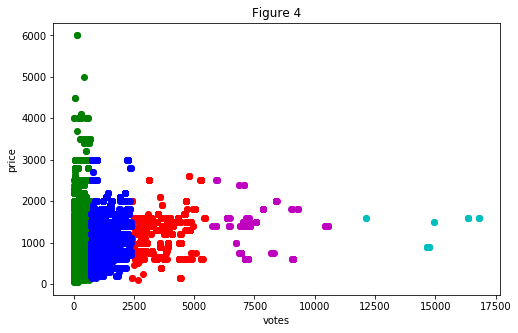

In [39]:
plot_votes_price_cluster(n_cluster=5)

Figure 4 shows the cluster group defined by success across votes and price.

In [40]:
generate_count_heatmap()

Figure 5 shows the heat map based on the number of restaurants in the certain location

In [41]:
generate_avg_price_heatmap()

Figure 6 shows the heat map based on the average price of restaurants in the certain location

In [46]:
generate_med_price_heatmap()

Figure 7 shows the heat map based on the median price of restaurants in the certain location

## Objective 2 
### Explanation of Results
We selected four algorithmic models that fit this dataset relatively well. We divided the dataset into ten parts, one for testing and the remaining nine parts for training. After training, the R2 score is used to test the accuracy of models' predictions. Except for Linear Regression, which has a relatively poor performance, all three models have a good level of accuracy. Extra trees had the highest score. Thus we had chosen this model as this project's prediction model.


Based on this model, we could adjust the restaurant opening strategy to a certain extent to achieve a higher level of success. A clear example of this application is shown below. When we chose to open a buffet type cafe in BTM at the price of 1000, which could be ordered online but not available for booking a table, our model predicted that the plan would only get a rating of 3.4 and only 152 votes. However, when we choose to make the cafe not available for online ordering but table reservations, the rating reaches 4.1 and the votes, which is a side indicator of the number of visitors, soars to 1145. If we want to take it a step further, then let go of online ordering and seat reservations, and the rating can come in at about 4.3 out of 1199, while votes remain at a similar level at 1090.

With a few simple changes, we can increase the plan's rating forecast by 25 per cent and seven times more votes. Although they are just data on a screen, they give the restaurant an additional point of reference to negate some unreasonable decisions and give advice.



In [43]:
predict_0 = pd.DataFrame([{"online_order": "Yes", "book_table": "No", "location": "BTM", 
                        "rest_type": "Cafe", "price": 1000, "meal_type": "Buffet"}])
predict(ET_model, predict_0)

array([[  3.375     , 151.50166667]])

In [44]:
predict_0 = pd.DataFrame([{"online_order": "No", "book_table": "Yes", "location": "BTM", 
                        "rest_type": "Cafe", "price": 1000, "meal_type": "Buffet"}])
predict(ET_model, predict_0)

array([[   4.11258333, 1145.4675    ]])

In [45]:
predict_0 = pd.DataFrame([{"online_order": "Yes", "book_table": "Yes", "location": "BTM", 
                         "rest_type": "Cafe", "price": 1000, "meal_type": "Buffet"}])
predict(ET_model, predict_0)

array([[   4.269, 1199.29 ]])

# Conclusion (5 marks)

### Achievements

Our data analysis suggests that a reasonable price for a restaurant in Bangalore is the 0-2000 range. If a higher probability of success is required, 1000-2000 would be a good choice. On the visualised heat map, most restaurants were in the BTM location, while the restaurants in the Sankey Road are in the most expensive group. We then use the prediction model using the Extra Trees algorithm to correct restaurant characteristics to achieve higher predictive success: higher ratings and reviews.

### Limitations

Our project has certain limitations in the three areas of data quality, data processing and data analysis.
Firstly, there is a particular bias in our data, and as a city with a giant population, the actual restaurant data should far exceed the magnitude of the data we get. Moreover, the restaurants that are not being recorded are more likely to be lower-priced restaurants that are not connected to the internet, which can bias the data analysis towards the middle and upper reaches.

When getting the corresponding coordinates of the restaurant, we have tried to use the restaurant's address to find the corresponding latitude and longitude in the first place. However, as the external library takes a few seconds on average to fetch a piece of data, our time does not allow us to fetch them one by one. With tens of thousands of pieces of data, we do not have the time to fetch them one by one, so we use the location's coordinates instead, which only have less than 100 unique values.

Also, in doing the prediction models, the models were taken more from a portion of the more basic algorithms, and they all produced r 2 scores around 0.70. There may be algorithms that have higher performance for this dataset.

### Future Work

In response to the limitation above, we also give three directions for future work accordingly. The first direction will be to obtain more data, including offline restaurants. Furthermore, the next one is to obtain address data and convert it to coordinate data. The last one is to use more models to test the data.